<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
import scipy as sp
from scipy import stats



In [6]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [7]:
# And a new friend - t
t1 = stats.t(30)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0350983390135313
1.0714285714285714


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [8]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

In [9]:
import random
random.seed(10)
population = []

def mean(list):
  average = np.sum(list)/len(list)
  return average

for _ in range(10000):
  population.append(random.randint(0,1))
  
print(population)
print(len(population))

sample = random.sample(population, 100)
print(sample)
print(len(sample))


print(sp.mean(sample))
print(sp.mean(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [0]:
import pandas as pd
import numpy as np

In [12]:
df = pd.DataFrame({"likes_coke": sample})
df.head()

df.likes_coke.mean()

0.59

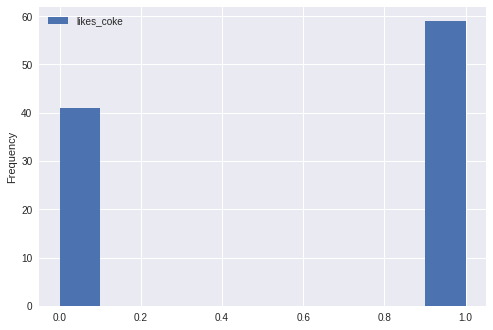

In [13]:
df.plot.hist()

In [14]:
df.likes_coke.describe()

count    100.000000
mean       0.590000
std        0.494311
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [15]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)
  
variance(df.likes_coke)

0.2443434343434343

In [16]:
def stddev(list):
  var = variance(list)
  return var**(1/2) 

stddev(df.likes_coke)

0.4943110704237103

In [17]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

1.8207158484808839


In [18]:
sp.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=1.6305521931951032, pvalue=0.10616238158708131)

In [19]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - mean(population))/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

1.6305521931951032


In [20]:
# dir(scipy.stats)
scipy.stats.ttest_1samp(df['likes_coke'], .5)

NameError: ignored

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars

In [0]:
# TODO - your code here!
votes_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

from scipy import stats

In [50]:
votes = pd.read_csv(votes_url, header=None, names=['party', 
                                                   'infant_bill', 
                                                   'water_project', 
                                                   'budget', 
                                                   'physician_bill', 
                                                   'aid_elsalvador',
                                                   'church_school',
                                                   'anti_satellite',
                                                   'contra_aid',
                                                   'mx_missile',
                                                   'immigration',
                                                   'synfuels',
                                                   'edu_spending',
                                                   'superfund_litigation',
                                                   'crime',
                                                   'duty_free',
                                                   's_africa_export'])

votes.shape

(435, 17)

In [51]:
votes.describe()

,party,infant_bill,water_project,budget,physician_bill,aid_elsalvador,church_school,anti_satellite,contra_aid,mx_missile,immigration,synfuels,edu_spending,superfund_litigation,crime,duty_free,s_africa_export
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [52]:
votes.isnull().sum()

party                   0
infant_bill             0
water_project           0
budget                  0
physician_bill          0
aid_elsalvador          0
church_school           0
anti_satellite          0
contra_aid              0
mx_missile              0
immigration             0
synfuels                0
edu_spending            0
superfund_litigation    0
crime                   0
duty_free               0
s_africa_export         0
dtype: int64

In [53]:
votes['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [54]:
votes_nan = pd.DataFrame()

for i in votes:
  votes_nan[i] = votes[i].replace('?', np.nan)
print(votes_nan.isnull().sum())

party                     0
infant_bill              12
water_project            48
budget                   11
physician_bill           11
aid_elsalvador           15
church_school            11
anti_satellite           14
contra_aid               15
mx_missile               22
immigration               7
synfuels                 21
edu_spending             31
superfund_litigation     25
crime                    17
duty_free                28
s_africa_export         104
dtype: int64


In [55]:
democrats = votes.loc[votes['party'] == 'democrat']
republicans = votes.loc[votes['party'] == 'republican']

democrats.shape, republicans.shape

((267, 17), (168, 17))

In [58]:
votes.head()

,party,infant_bill,water_project,budget,physician_bill,aid_elsalvador,church_school,anti_satellite,contra_aid,mx_missile,immigration,synfuels,edu_spending,superfund_litigation,crime,duty_free,s_africa_export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


<Figure size 576x432 with 0 Axes>

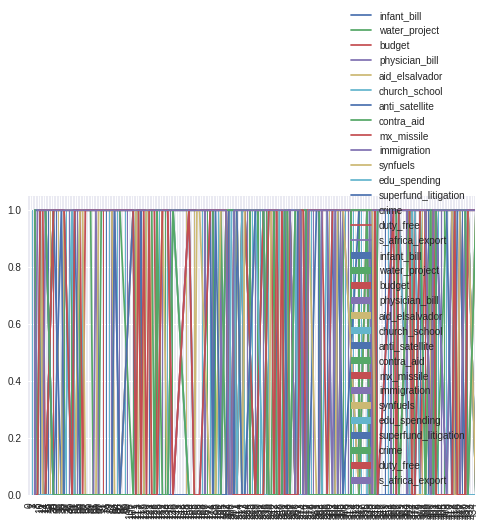

In [90]:
dem_enc = democrats.drop(['party'], axis=1).replace('?', np.nan).fillna(method='ffill').replace({'y':1,'n':0})
rep_enc = republicans.drop(['party'], axis=1).replace('?', np.nan).fillna(method='ffill').replace({'y':1,'n':0})


fig = plt.figure(figsize=(8,6))
ax = dem_enc.plot()

rep_enc.plot(kind='bar', ax=ax)

In [93]:
republicans.head()

,party,infant_bill,water_project,budget,physician_bill,aid_elsalvador,church_school,anti_satellite,contra_aid,mx_missile,immigration,synfuels,edu_spending,superfund_litigation,crime,duty_free,s_africa_export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
10,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


In [92]:
rep_enc.head()

,infant_bill,water_project,budget,physician_bill,aid_elsalvador,church_school,anti_satellite,contra_aid,mx_missile,immigration,synfuels,edu_spending,superfund_litigation,crime,duty_free,s_africa_export
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0.0,1,1,1,0,1
7,0,1,0,1,1,1,0,0,0,0,0.0,0,1,1,0,1
8,0,1,0,1,1,1,0,0,0,0,0.0,1,1,1,0,1
10,0,1,0,1,1,0,0,0,0,0,0.0,1,1,1,0,0


In [0]:
pd.crosstab(index=votes.drop(['party'], axis=1).columns, columns=votes['party'], values=votes.drop(['party'], axis=1).replace('?', np.nan).fillna(method='ffill'), aggfunc='count')

In [97]:
votes.columns

Index(['party', 'infant_bill', 'water_project', 'budget', 'physician_bill',
       'aid_elsalvador', 'church_school', 'anti_satellite', 'contra_aid',
       'mx_missile', 'immigration', 'synfuels', 'edu_spending',
       'superfund_litigation', 'crime', 'duty_free', 's_africa_export'],
      dtype='object')

In [0]:
votes.pivot_table(index=votes['party'], columns=votes.drop(['party'], axis=1).replace('?', np.nan).fillna(method='ffill')[['infant_bill', 
                                                   'water_project', 
                                                   'budget', 
                                                   'physician_bill', 
                                                   'aid_elsalvador',
                                                   'church_school',
                                                   'anti_satellite',
                                                   'contra_aid',
                                                   'mx_missile',
                                                   'immigration',
                                                   'synfuels',
                                                   'edu_spending',
                                                   'superfund_litigation',
                                                   'crime',
                                                   'duty_free',
                                                   's_africa_export']])

In [0]:
counts_party = pd.DataFrame({'vote':['yes', 'no']})

(dem_yes, rep_yes, dem_no, rep_no) = int()

for i in votes.drop(['party']):
  for j in votes[i]:
    if j == 'y':
      yes += 1;
    elif j == 'n':
      no += 1
  counts_party[]
      
    
democrats = votes.loc[votes['party'] == 'democrat']
republicans = votes.loc[votes['party'] == 'republican']


In [106]:
for i in votes:
  print(i)

party
infant_bill
water_project
budget
physician_bill
aid_elsalvador
church_school
anti_satellite
contra_aid
mx_missile
immigration
synfuels
edu_spending
superfund_litigation
crime
duty_free
s_africa_export
